In [118]:
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [11]:
import sys
sys.path.append("/tmp/fastai/old")
import fastai
from fastai.conv_learner import *
from fastai.dataset import *

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [148]:
image_path = './data/aug_images/600_red.png'
image = Image.open(image_path)

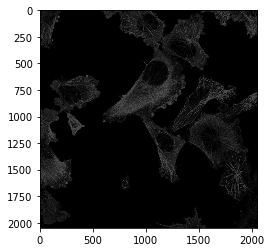

In [149]:
plt.imshow(image)

In [7]:
np.array(image).shape

(1728, 1728, 3)

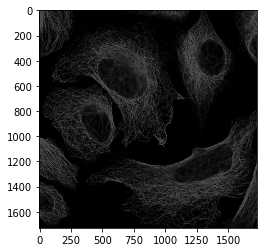

In [121]:
gray_image = ImageOps.grayscale(image)
plt.imshow(gray_image)
gray_image.save('test.png')

In [105]:
png_path = './data/test/3a9ebc54-bad0-11e8-b2b8-ac1f6b6435d0_red.png'

In [106]:
png_image = Image.open(png_path)

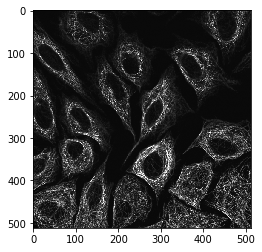

In [67]:
plt.imshow(png_image)

In [68]:
np.array(png_image).shape

(512, 512)

In [69]:
flags = cv2.IMREAD_GRAYSCALE

In [198]:
image_path = './data/aug_images/15575_red.png'
cv_image = cv2.imread(image_path, flags).astype(np.float32)
cv_image.shape

(2048, 2048)

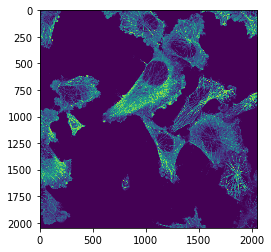

In [154]:
plt.imshow(cv_image)

(2048, 2048)


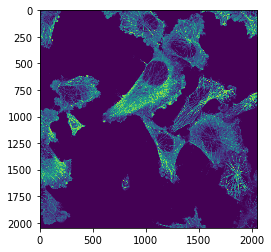

In [155]:
test_image_path = './data/aug_images/600_red.jpg'
test_image = cv2.imread(test_image_path, flags).astype(np.float32)
print(test_image.shape)
plt.imshow(test_image)

In [156]:
cv_image_png = cv2.imread(png_path, flags).astype(np.float32)
cv_image_png.shape

(512, 512)

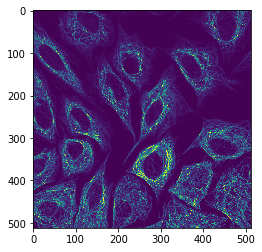

In [157]:
plt.imshow(cv_image_png)

In [169]:
aug_info_df = pd.read_csv('./data/augment.csv', names=['Id', 'Target'])

In [170]:
aug_info_df.head()

,Id,Target
0,0,25
1,1,25
2,2,25
3,3,25
4,4,25


In [171]:
aug_info_df.shape

(64213, 2)

In [172]:
train_df = pd.read_csv('./data/train.csv')

In [173]:
train_df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [174]:
train_df.shape

(31072, 2)

In [175]:
concat_df = pd.concat([train_df, aug_info_df])

In [176]:
concat_df.index = list(range(concat_df.shape[0]))

In [177]:
concat_df

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,2 0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,7


In [178]:
concat_df.to_csv('./data/augment_train.csv')

In [206]:
new_df = pd.read_csv('./data/augment_train.csv')

In [207]:
new_df.query('Id == "15572"')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Id,Target


In [208]:
new_df.query('Id in ["4270", "15573", "37343"]')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Id,Target


In [203]:
new_df.drop(index=[46643], inplace=True)

In [205]:
new_df.to_csv('./data/augment_train.csv')

In [ ]:
# 15572の黄色だけサイズが違う